# IRIS FLOWER CLASSIFICATION

# importing necessary libraries

In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings(action='ignore')

# DATASET LOADING

In [31]:
iris = pd.read_csv ('Iris.csv')

In [32]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.shape

(150, 5)

# CHECKING FOR NULL VALUES

In [11]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
count =  iris.species.value_counts()
print(count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [14]:
lab = iris.species.unique().tolist()
lab

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# DATA VISUALIZATION

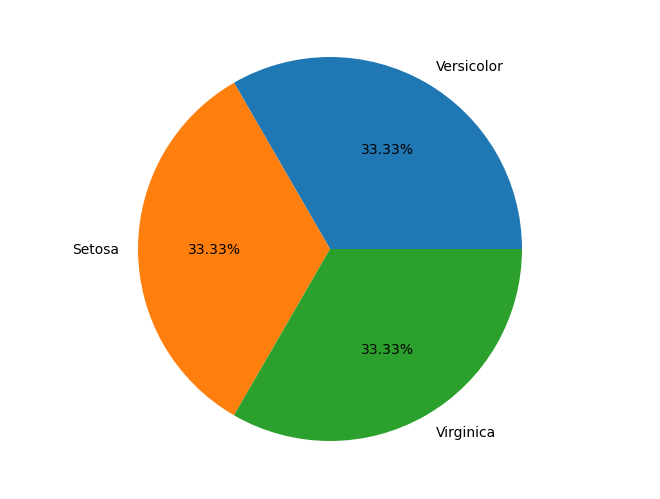

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

# Plotting scatter plot to demonstrate relationship between sepal length and sepal width

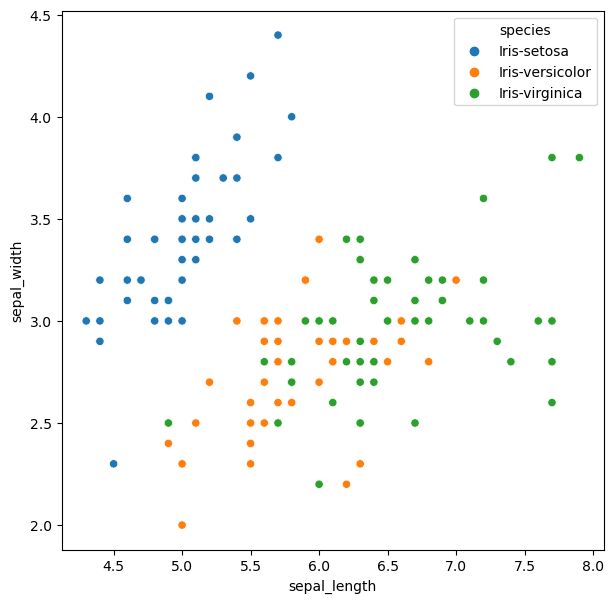

In [38]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x="sepal_length", y="sepal_width",data=iris,hue="species")
plt.show()

# Plotting scatter plot to demonstrate relationship between petal length and petal width

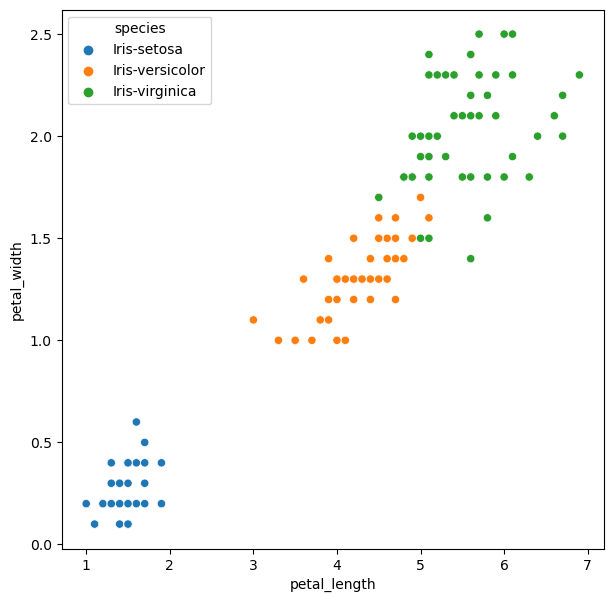

In [39]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x="petal_length", y="petal_width",data=iris,hue="species")
plt.show()


# Pair Plot

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [49]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [50]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length','petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
                
test_y = test.species

In [51]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
147,6.5,3.0,5.2,2.0
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
136,6.3,3.4,5.6,2.4
135,7.7,3.0,6.1,2.3


In [52]:
test_y.head()

111     Iris-virginica
51     Iris-versicolor
143     Iris-virginica
42         Iris-setosa
128     Iris-virginica
Name: species, dtype: object

In [65]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9736842105263158


In [54]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[14  0  0]
 [ 0 10  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [55]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 1.0


In [56]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9736842105263158


In [57]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9736842105263158


In [58]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9473684210526315


In [59]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree


# PREDICTING FOR THE NEW DATA

In [64]:
# First, load the new data into a pandas DataFrame
new_data = pd.DataFrame({
    'sepal_length': [ 5.1, 6.9],
    'sepal_width': [3.5, 3.1],
    'petal_length': [1.4, 4.9],
    'petal_width': [0.2, 1.5]
})

# Scale the new data using the StandardScaler 
scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(new_data)

# Use the trained logistic regression model to predict the species of the new data
predicted_species = model.predict(scaled_new_data)

# Print the predicted species
print(predicted_species)

['Iris-setosa' 'Iris-setosa']
